In [58]:
from brian2 import *
%matplotlib inline

# fn's defining the gradients given a certain tuple of values
def get_delta_v(vt, ut, I):
    return 0.04*vt**2+5.*vt+140.-ut + I

def get_delta_u(a, b, vt, ut):
    return a*(b*vt - ut)

In [77]:
def generate_plot_and_print_spike_num_for_values(a, b):
    # init. values
    v = -65; u = 0;
    # constants
    c = -65; d = 8;
    # time-step used in numerical integration
    dt = 0.005;
    
    v_vals = []; u_vals = []; timesteps = []
    n_steps = 200000
    spike_count = 0
    for i in range(0, n_steps):
        dv = get_delta_v(v, u, I=0)  # no external stimuli
        du = get_delta_u(a, b, v, u)
        v += dv * dt
        u += du * dt
        if(v>=30):
            spike_count += 1
            v = c
            u = u + d
        v_vals += [v]
        u_vals += [u]
        timesteps += [i*dt]


    # plotting
    tot_time = n_steps * dt
    n_bins = 10
    axline_step = tot_time / n_bins
    figure(figsize=(11, 6))
    for l in range(n_bins+1):
        axvline(l*axline_step, ls='--', c='k')
    axhline(30, ls='-', c='lightgray', lw=3)
    plot(timesteps, v_vals, '-', label='v')
    plot(timesteps, u_vals, '-', label='u')
    xlabel('Time (ms)')
    ylabel('v (mV)')
    title('Plot for constant parametrisation, with a='+"{:5.4f}".format(a)+
          ', b='+"{:4.3f}".format(b)+
          '. Oscillating at '+str(spike_count)+' Hz');
    
    return spike_count

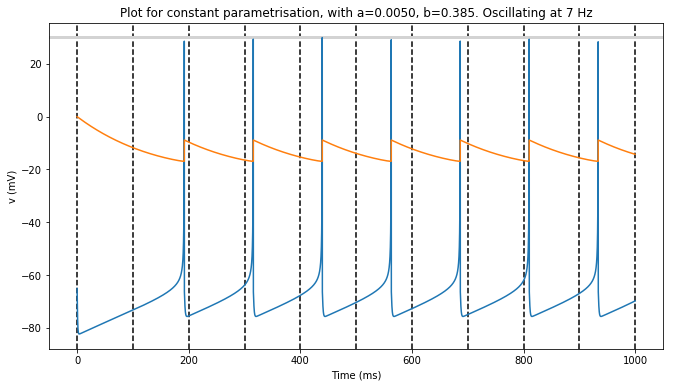

In [78]:
a = 0.0050; b = 0.3850  # table 9
_ = generate_plot_and_print_spike_num_for_values(a, b)

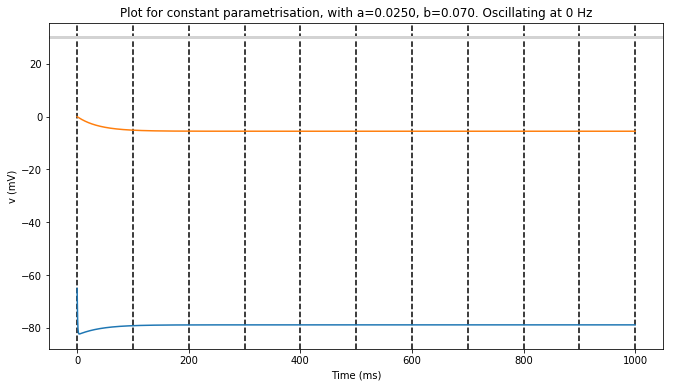

In [79]:
# NOTE: This is a configuration where the effects predicted by Factorial design are not observed.
#  It is also the only configuration which does not fire tonically
a = 0.0250; b = 0.0700  # table 10.
_ = generate_plot_and_print_spike_num_for_values(a, b)

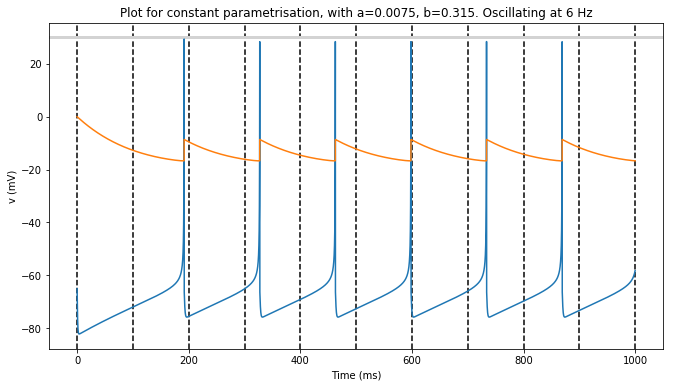

In [80]:
a = 0.0075; b = 0.3150  # table 11
_ = generate_plot_and_print_spike_num_for_values(a, b)

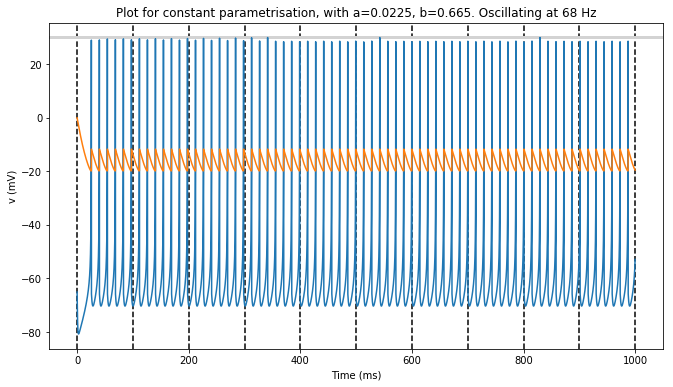

In [81]:
a = 0.0225; b = 0.6650  # table 12
_ = generate_plot_and_print_spike_num_for_values(a, b)

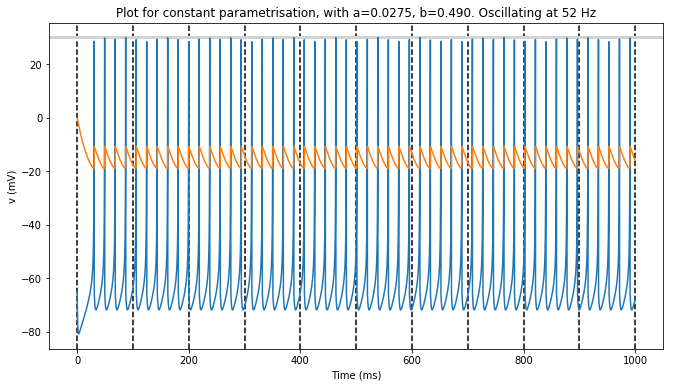

In [82]:
a = 0.0275; b = 0.490  # table 13
_ = generate_plot_and_print_spike_num_for_values(a, b)

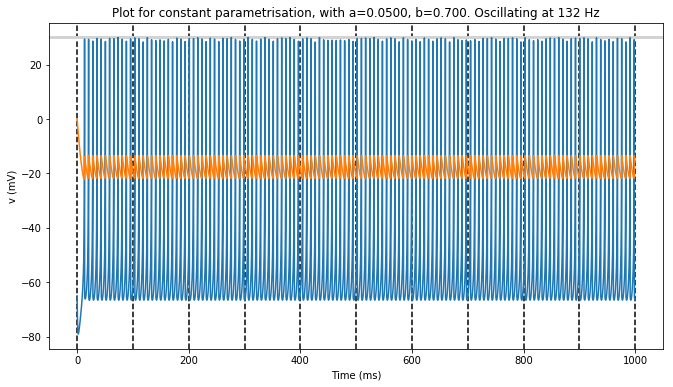

In [83]:
a = 0.05; b = 0.700  # table 14
_ = generate_plot_and_print_spike_num_for_values(a, b)

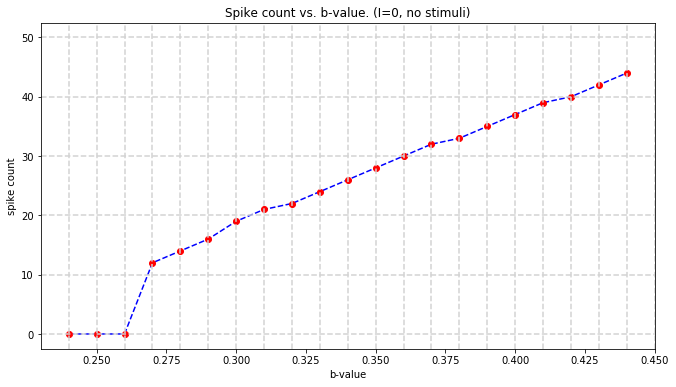

In [84]:
def calculate_spike_count_for_values(a, b, I):
    # init. values
    v = -65; u = 0;
    # constants
    c = -65; d = 8;
    # time-step used in numerical integration
    dt = 0.005;
    
    v_vals = []; u_vals = []; timesteps = []
    n_steps = 200000
    spike_count = 0
    for i in range(0, n_steps):
        dv = get_delta_v(v, u, I)
        du = get_delta_u(a, b, v, u)
        v += dv * dt
        u += du * dt
        if(v>=30):
            spike_count += 1
            v = c
            u = u + d
        v_vals += [v]
        u_vals += [u]
        timesteps += [i*dt]
    return spike_count

spike_counts = []
b_vals = []
a = 0.0275
b = 0.24
delta_b = 0.01
for t in range(0, 21):
    spike_counts += [calculate_spike_count_for_values(a, b, I=0)]
    b_vals += [b]
    b += delta_b
    
figure(figsize=(11, 6))
plot(b_vals, spike_counts, 'b--')
plot(b_vals, spike_counts, 'ro')
for l in range(len(spike_counts)+1):
    axvline(b-l*delta_b, ls='--', c='lightgray')
for i in range(6):
    axhline(10*i, ls='--', c='lightgray')
xlabel('b-value')
ylabel('spike count')
title('Spike count vs. b-value. (I=0, no stimuli)');

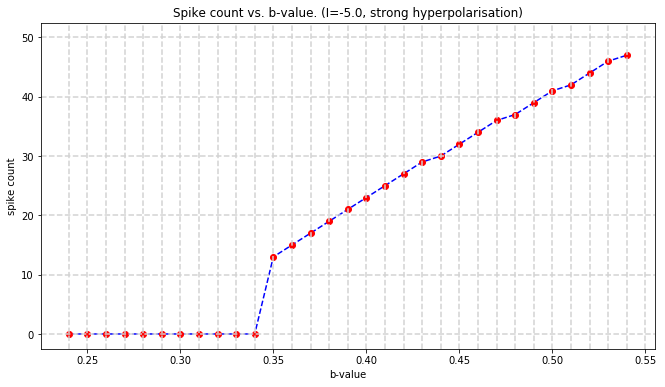

In [85]:
spike_counts = []
b_vals = []
a = 0.0275
b = 0.24
delta_b = 0.01
I=-5
for t in range(0, 31):
    spike_counts += [calculate_spike_count_for_values(a, b, I)]
    b_vals += [b]
    b += delta_b
    
figure(figsize=(11, 6))
plot(b_vals, spike_counts, 'b--')
plot(b_vals, spike_counts, 'ro')
for l in range(len(spike_counts)+1):
    axvline(b-l*delta_b, ls='--', c='lightgray')
for i in range(6):
    axhline(10*i, ls='--', c='lightgray')
xlabel('b-value')
ylabel('spike count')
title('Spike count vs. b-value. (I='+'{:4.1f}'.format(I)+', strong hyperpolarisation)');

In [228]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
